In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

#### Đọc dữ liệu

In [2]:
# Example job categories
jobs = ["doctor", "dentist", "engineer", "teacher", "lawyer", "nurse", "pharmacist", "architect", 
        "chef", "scientist", "musician", "artist", "pilot", "firefighter", "police officer", 
        "accountant", "software developer", "mechanic", "electrician", "plumber", 
        "salesperson", "marketing manager", "graphic designer", "journalist", 
        "data analyst", "psychologist", "biologist", "chemist", "physicist", "economist"]

# Generate random height, weight, and job
data = []
for _ in range(2000):
    height = round(random.uniform(1.5, 2.0), 2)  # height in meters
    weight = round(random.uniform(50, 100), 2)   # weight in kg
    job = random.choice(jobs)
    data.append([height, weight, job])

# Create a DataFrame
df = pd.DataFrame(data, columns=['Height_m', 'Weight_kg', 'Job'])

# Save to CSV
df.to_csv('persons_dataset.csv', index=False)

print("Dataset generated and saved as 'persons_dataset.csv'")


Dataset generated and saved as 'persons_dataset.csv'


In [3]:
df

,Height_m,Weight_kg,Job
0,1.63,96.58,biologist
1,1.51,89.81,engineer
2,1.50,72.78,nurse
3,1.86,76.33,architect
4,1.51,68.90,musician
...,...,...,...
1995,1.56,61.80,chemist
1996,1.91,82.61,software developer
1997,1.60,78.06,police officer
1998,1.91,59.49,plumber


In [4]:
def calculate_bmi(row):
    weight = row["Weight_kg"]
    height = row["Height_m"]
    return  weight / (height ** 2)

def assign_bmi(row):
    bmi = row["bmi"]
    if bmi < 18.5:
        return "Underweight"
    elif bmi < 25:
        return "Normal weight"
    return "Overweight"

df["bmi"] = df.apply(calculate_bmi, axis = 1)
df["bmi_category"] = df.apply(assign_bmi, axis = 1)
df

,Height_m,Weight_kg,Job,bmi,bmi_category
0,1.63,96.58,biologist,36.350634,Overweight
1,1.51,89.81,engineer,39.388623,Overweight
2,1.50,72.78,nurse,32.346667,Overweight
3,1.86,76.33,architect,22.063244,Normal weight
4,1.51,68.90,musician,30.217973,Overweight
...,...,...,...,...,...
1995,1.56,61.80,chemist,25.394477,Overweight
1996,1.91,82.61,software developer,22.644664,Normal weight
1997,1.60,78.06,police officer,30.492187,Overweight
1998,1.91,59.49,plumber,16.307119,Underweight


#### Vẽ biểu đồ để xem phân phối của dữ liệu

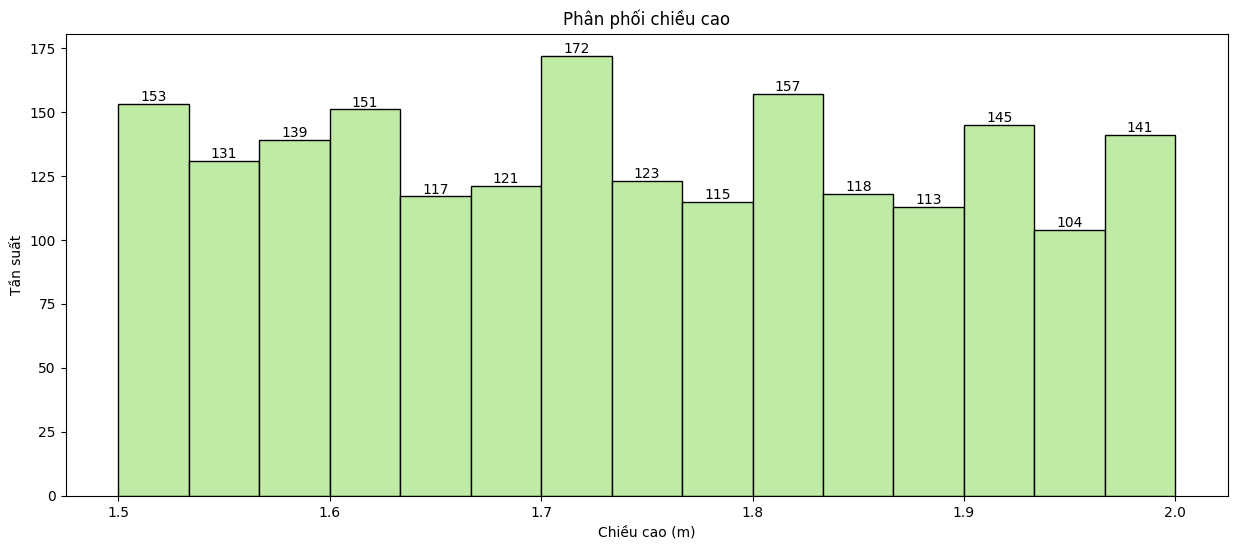

In [5]:
plt.figure(figsize=(15,6))
n, bins, patches = plt.hist(df["Height_m"], bins=15, color='#C0EBA6', edgecolor='black')

# Đặt tiêu đề và nhãn trục
plt.title('Phân phối chiều cao')
plt.xlabel('Chiều cao (m)')
plt.ylabel('Tần suất')

# Hiển thị số trên các cột
for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, patches[i].get_height(), int(n[i]), 
             ha='center', va='bottom')

# Hiển thị biểu đồ
plt.show()

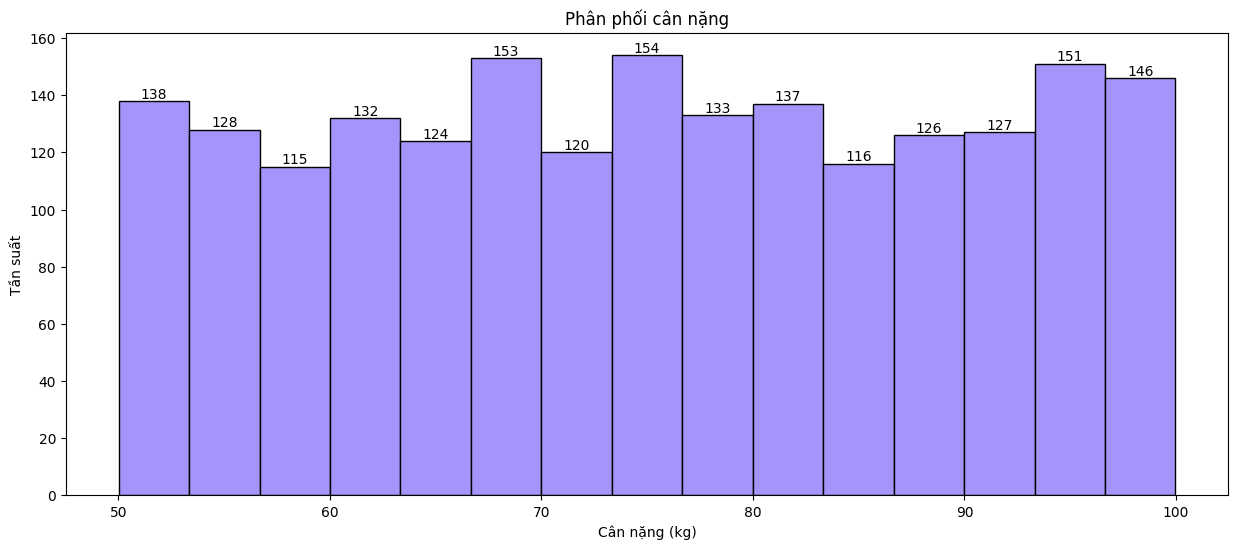

In [6]:
plt.figure(figsize=(15,6))
n, bins, patches = plt.hist(df["Weight_kg"], bins=15, color='#A594F9', edgecolor='black')

# Đặt tiêu đề và nhãn trục
plt.title('Phân phối cân nặng')
plt.xlabel('Cân nặng (kg)')
plt.ylabel('Tần suất')

# Hiển thị số trên các cột
for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, patches[i].get_height(), int(n[i]), 
             ha='center', va='bottom')

# Hiển thị biểu đồ
plt.show()

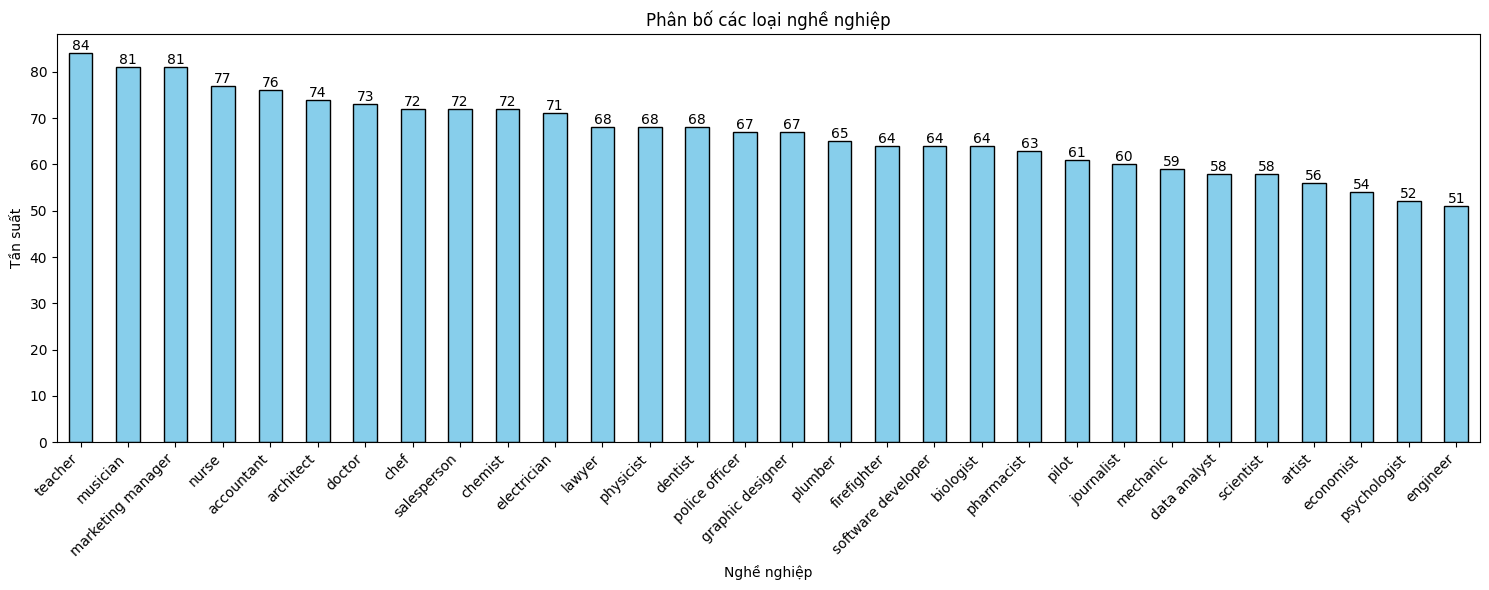

In [7]:
job_counts = df['Job'].value_counts()

# Vẽ biểu đồ cột
plt.figure(figsize=(15, 6))
bars = job_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Đặt tiêu đề và nhãn trục
plt.title('Phân bố các loại nghề nghiệp')
plt.xlabel('Nghề nghiệp')
plt.ylabel('Tần suất')

# Hiển thị số trên các cột
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), int(bar.get_height()), 
             ha='center', va='bottom')

# Hiển thị biểu đồ
plt.xticks(rotation=45, ha='right')  # Xoay nhãn cho dễ nhìn
plt.tight_layout()
plt.show()

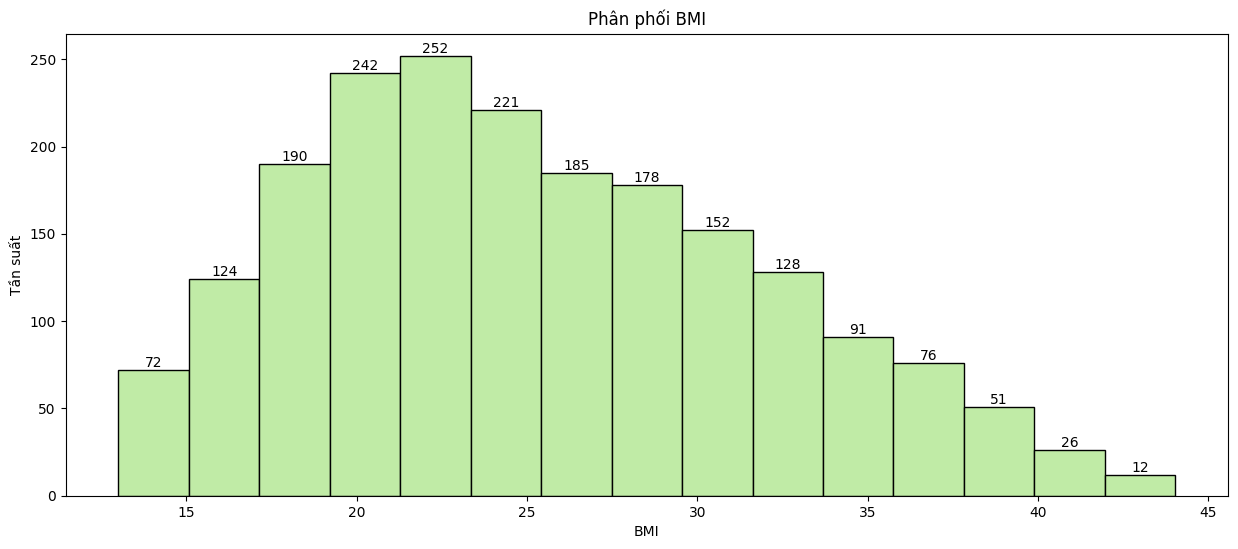

In [8]:
plt.figure(figsize=(15,6))
n, bins, patches = plt.hist(df["bmi"], bins=15, color='#C0EBA6', edgecolor='black')

# Đặt tiêu đề và nhãn trục
plt.title('Phân phối BMI')
plt.xlabel('BMI')
plt.ylabel('Tần suất')

# Hiển thị số trên các cột
for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, patches[i].get_height(), int(n[i]), 
             ha='center', va='bottom')

# Hiển thị biểu đồ
plt.show()

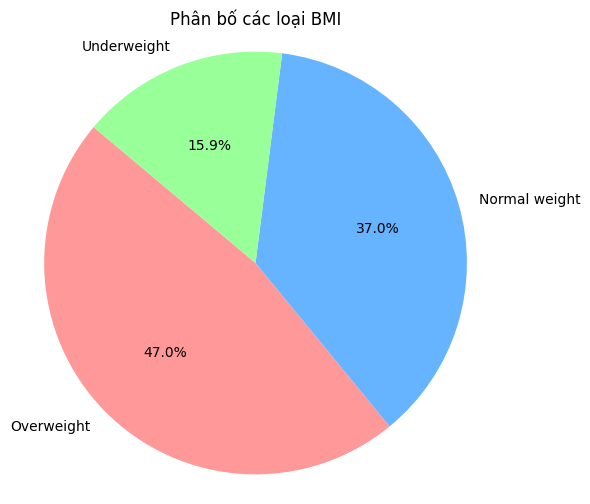

In [9]:
# Tính toán tần suất của các loại BMI
bmi_counts = df['bmi_category'].value_counts()

# Vẽ biểu đồ tròn
plt.figure(figsize=(6,6))
plt.pie(bmi_counts, labels=bmi_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Phân bố các loại BMI')
plt.axis('equal')  # Đảm bảo biểu đồ tròn

# Hiển thị biểu đồ
plt.show()

#### Huấn luyện mô hình

In [10]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error

##### Trích chọn đặc trưng

In [11]:
df["Job_encode"] = LabelEncoder().fit_transform(df["Job"])
df.to_csv("person.csv", index=False)
df

,Height_m,Weight_kg,Job,bmi,bmi_category,Job_encode
0,1.63,96.58,biologist,36.350634,Overweight,3
1,1.51,89.81,engineer,39.388623,Overweight,11
2,1.50,72.78,nurse,32.346667,Overweight,19
3,1.86,76.33,architect,22.063244,Normal weight,1
4,1.51,68.90,musician,30.217973,Overweight,18
...,...,...,...,...,...,...
1995,1.56,61.80,chemist,25.394477,Overweight,5
1996,1.91,82.61,software developer,22.644664,Normal weight,28
1997,1.60,78.06,police officer,30.492187,Overweight,24
1998,1.91,59.49,plumber,16.307119,Underweight,23


In [12]:
X = df[["Height_m", "Job_encode"]]
y = df["Weight_kg"]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

##### Chuẩn hóa dữ liệu

In [14]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### Mô hình Linear Regression

In [15]:
model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred)
mae_lr = mean_absolute_error(y_test, y_pred)
mape_lr = mean_absolute_percentage_error(y_test, y_pred)
rmse_lr = root_mean_squared_error(y_test, y_pred)

In [16]:
X_train_dl = X_train.astype(np.float32)

##### Mô hình CNN

In [17]:
import tensorflow as tf
import numpy as np

# Mô hình CNN với tf.Module
class CNNModel(tf.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = tf.Variable(tf.random.normal([1, 1, 1, 32]), name='conv1_weights', dtype=tf.float32)  # Lớp Conv2D với 32 filters
        self.dense1 = tf.Variable(tf.random.normal([64, 64]), name='dense1_weights', dtype=tf.float32)  # Fully connected layer 1
        self.dense2 = tf.Variable(tf.random.normal([64, 1]), name='dense2_weights', dtype=tf.float32)   # Fully connected layer 2

    def __call__(self, x):
        x = tf.reshape(x, [-1, 2, 1, 1])  # Reshape input thành [batch_size, height=2, width=1, channels=1]
        conv = tf.nn.conv2d(x, self.conv1, strides=[1, 1, 1, 1], padding="VALID")
        conv = tf.nn.relu(conv)  # Activation ReLU
        conv_flat = tf.reshape(conv, [-1, 64])  # Flatten
        dense1_out = tf.matmul(conv_flat, self.dense1)
        dense1_out = tf.nn.relu(dense1_out)  # Activation ReLU
        output = tf.matmul(dense1_out, self.dense2)  # Output layer
        return output

# Khởi tạo mô hình
model = CNNModel()

# Hàm mất mát (loss function)
loss_fn = tf.losses.MeanSquaredError()

# Optimizer
optimizer = tf.optimizers.Adam(learning_rate=0.001)

# Hàm huấn luyện một batch
@tf.function
def train_step(X, y):
    with tf.GradientTape() as tape:
        predictions = model(X)
        loss = loss_fn(y, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss

# Hàm tính toán loss trên tập test
@tf.function
def test_loss(X, y):
    predictions = model(X)
    loss = loss_fn(y, predictions)
    return loss

X_train_dl = X_train.astype(np.float32)
y_train_dl = y_train.values.astype(np.float32)
X_test_dl = X_test.astype(np.float32)
y_test_dl = y_test.values.astype(np.float32)

# Store loss values
loss_values = []
test_loss_values = []

# Huấn luyện mô hình
epochs = 500
batch_size = 32
for epoch in range(epochs):
    epoch_loss = 0
    for i in range(0, len(X_train_dl), batch_size):
        X_batch = X_train_dl[i:i+batch_size]
        y_batch = y_train_dl[i:i+batch_size]
        loss = train_step(X_batch, y_batch)
        epoch_loss += loss.numpy()
    
    # Tính toán loss trên tập test
    test_loss_value = test_loss(X_test_dl, y_test_dl).numpy()
    loss_values.append(epoch_loss / (len(X_train_dl) // batch_size))
    test_loss_values.append(test_loss_value)

    print(f'Epoch {epoch + 1}/{epochs}, Loss: {epoch_loss / (len(X_train_dl) // batch_size)}, Test Loss: {test_loss_value}')


Epoch 1/500, Loss: 5870.353203125, Test Loss: 4873.86279296875
Epoch 2/500, Loss: 4041.830693359375, Test Loss: 3308.1279296875
Epoch 3/500, Loss: 2640.572263183594, Test Loss: 2131.8388671875
Epoch 4/500, Loss: 1684.996151123047, Test Loss: 1433.849365234375
Epoch 5/500, Loss: 1219.1395544433594, Test Loss: 1166.77197265625
Epoch 6/500, Loss: 1078.8227941894531, Test Loss: 1103.0897216796875
Epoch 7/500, Loss: 1048.103028564453, Test Loss: 1085.27734375
Epoch 8/500, Loss: 1034.9743975830079, Test Loss: 1073.6038818359375
Epoch 9/500, Loss: 1023.856318359375, Test Loss: 1063.0692138671875
Epoch 10/500, Loss: 1013.240791015625, Test Loss: 1053.02001953125
Epoch 11/500, Loss: 1003.0107763671875, Test Loss: 1043.769775390625
Epoch 12/500, Loss: 993.1983044433593, Test Loss: 1034.997314453125
Epoch 13/500, Loss: 983.7969885253906, Test Loss: 1026.3719482421875
Epoch 14/500, Loss: 974.4067010498047, Test Loss: 1017.8857421875
Epoch 15/500, Loss: 964.8533245849609, Test Loss: 1009.4341430664

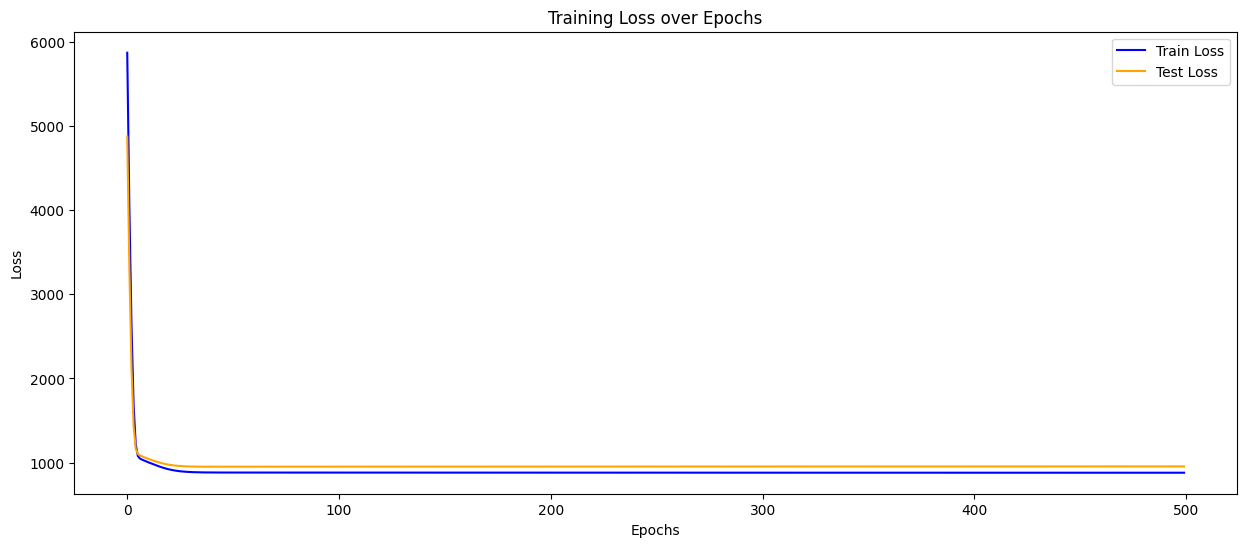

In [18]:
# Plotting the loss over epochs
plt.figure(figsize=(15, 6))
plt.plot(loss_values, label='Train Loss', color='blue')
plt.plot(test_loss_values, label='Test Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

In [19]:
y_pred = model(X_test_dl).numpy()

mse_cnn = mean_squared_error(y_test_dl, y_pred)
mae_cnn = mean_absolute_error(y_test_dl, y_pred)
mape_cnn = mean_absolute_percentage_error(y_test_dl, y_pred)
rmse_cnn = root_mean_squared_error(y_test_dl, y_pred)

In [20]:
# save model
np.save('conv1_weights.npy', model.conv1.numpy())
np.save('dense1_weights.npy', model.dense1.numpy())
np.save('dense2_weights.npy', model.dense2.numpy())

##### Mô hình RNN

In [21]:
import tensorflow as tf
import numpy as np

class SimpleRNN:
    def __init__(self, input_size, hidden_size):
        self.hidden_size = hidden_size
        self.Wxh = tf.Variable(tf.random.normal([input_size, hidden_size]), name='Wxh')
        self.Whh = tf.Variable(tf.random.normal([hidden_size, hidden_size]), name='Whh')
        self.bh = tf.Variable(tf.zeros([hidden_size]), name='bh')
        self.Why = tf.Variable(tf.random.normal([hidden_size, 1]), name='Why')
        self.by = tf.Variable(tf.zeros([1]), name='by')

    def step(self, x, h):
        h = tf.tanh(tf.matmul(x, self.Wxh) + tf.matmul(h, self.Whh) + self.bh)
        y = tf.matmul(h, self.Why) + self.by
        return y, h

    def forward(self, x):
        h = tf.zeros([x.shape[0], self.hidden_size])  # Initialize hidden state
        for t in range(x.shape[1]):  # Loop over time steps
            y, h = self.step(x[:, t, :], h)
        return y

    @property
    def trainable_variables(self):
        return [self.Wxh, self.Whh, self.bh, self.Why, self.by]

# Instantiate model
model = SimpleRNN(input_size=2, hidden_size=64)

# Instantiate optimizer
optimizer = tf.optimizers.Adam()

# Loss function
loss_fn = tf.losses.MeanSquaredError()

@tf.function
def train_step(x, y):
    with tf.GradientTape() as tape:
        predictions = model.forward(x)
        loss = loss_fn(y, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss

# Function to calculate test loss
@tf.function
def test_loss(x, y):
    predictions = model.forward(x)
    loss = loss_fn(y, predictions)
    return loss

# Prepare the training and test data
X_train_dl = X_train.astype(np.float32).reshape(-1, 1, 2)
y_train_dl = y_train.values.astype(np.float32)  # Ensure y_train is properly formatted
X_test_dl = X_test.astype(np.float32).reshape(-1, 1, 2)
y_test_dl = y_test.values.astype(np.float32)  # Ensure y_test is properly formatted

loss_values = []
test_loss_values = []

epochs = 500
batch_size = 32
for epoch in range(epochs):
    for i in range(0, len(X_train_dl), batch_size):
        X_batch = X_train_dl[i:i + batch_size]
        y_batch = y_train_dl[i:i + batch_size]
        loss = train_step(X_batch, y_batch)
    
    # Calculate test loss
    test_loss_value = test_loss(X_test_dl, y_test_dl).numpy()
    loss_values.append(loss.numpy())
    test_loss_values.append(test_loss_value)
    
    print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss.numpy()}, Test Loss: {test_loss_value}')


Epoch 1/500, Loss: 5482.9013671875, Test Loss: 5838.61474609375
Epoch 2/500, Loss: 4852.3388671875, Test Loss: 5191.4228515625
Epoch 3/500, Loss: 4252.99560546875, Test Loss: 4574.74072265625
Epoch 4/500, Loss: 3686.544189453125, Test Loss: 3990.161865234375
Epoch 5/500, Loss: 3161.9521484375, Test Loss: 3446.8017578125
Epoch 6/500, Loss: 2686.76708984375, Test Loss: 2952.431884765625
Epoch 7/500, Loss: 2264.31005859375, Test Loss: 2510.61279296875
Epoch 8/500, Loss: 1894.1751708984375, Test Loss: 2121.1552734375
Epoch 9/500, Loss: 1573.60107421875, Test Loss: 1781.4718017578125
Epoch 10/500, Loss: 1299.019775390625, Test Loss: 1488.1524658203125
Epoch 11/500, Loss: 1067.5693359375, Test Loss: 1238.564697265625
Epoch 12/500, Loss: 876.357666015625, Test Loss: 1030.0596923828125
Epoch 13/500, Loss: 721.317138671875, Test Loss: 858.7454223632812
Epoch 14/500, Loss: 597.646240234375, Test Loss: 719.9273071289062
Epoch 15/500, Loss: 500.504150390625, Test Loss: 608.8191528320312
Epoch 16/5

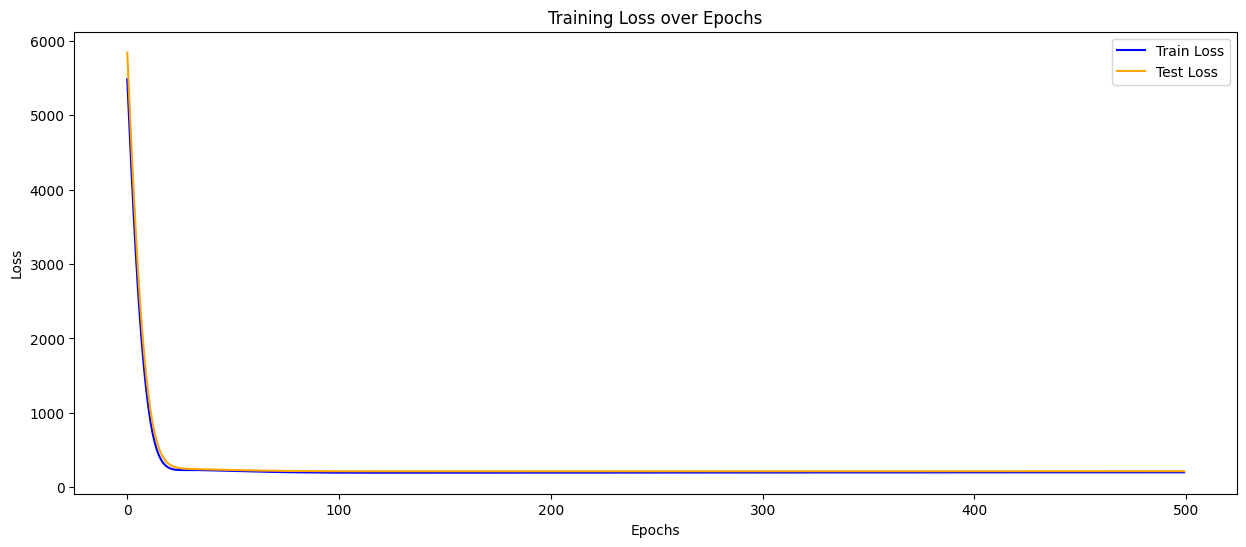

In [22]:
# Plotting the loss over epochs
plt.figure(figsize=(15, 6))
plt.plot(loss_values, label='Train Loss', color='blue')
plt.plot(test_loss_values, label='Test Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

In [23]:
y_pred = model.forward(X_test_dl).numpy() 

mse_rnn = mean_squared_error(y_test_dl, y_pred)
mae_rnn = mean_absolute_error(y_test_dl, y_pred)
mape_rnn = mean_absolute_percentage_error(y_test_dl, y_pred)
rmse_rnn = root_mean_squared_error(y_test_dl, y_pred)

In [24]:
for i in model.trainable_variables:
    np.save(f'{i.name[:-2]}.npy', i.numpy())

In [25]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Giả sử đầu vào là 2 cột số nguyên, ta reshape lại thành định dạng (batch_size, 2, 1)
input_shape = (2, 1)  # 2 đặc trưng và 1 kênh (channel)

# Xây dựng mô hình CNN
model = models.Sequential([
    layers.Input(shape=input_shape),                      # Layer 1: Input layer
    layers.Conv1D(32, kernel_size=1, activation='relu'),   # Layer 2: Convolutional layer
    layers.Conv1D(64, kernel_size=1, activation='relu'),   # Layer 3: Convolutional layer
    layers.Flatten(),                                     # Layer 4: Flatten layer
    layers.Dense(64, activation='relu'),                   # Layer 5: Fully connected layer
    layers.Dense(1)                                        # Output layer: Dự đoán điểm cuối cùng
])

# Compile mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

# In tóm tắt mô hình
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 2, 32)          │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 2, 64)          │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,497 (41.00 KB)

 Trainable params: 10,497 (41.00 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
X_train.shape

(1600, 2)

In [27]:
# Huấn luyện mô hình với dữ liệu đã chuẩn bị
model.fit(X_train, y_train, epochs=25, batch_size=1, verbose=1)

Epoch 1/25
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 1525.1703
Epoch 2/25
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 244.7581
Epoch 3/25
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 219.6705
Epoch 4/25
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 219.2942
Epoch 5/25
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 217.7047
Epoch 6/25
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 215.6680
Epoch 7/25
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 211.0958
Epoch 8/25
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 211.0210
Epoch 9/25
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 224.5748
Epoch 10/25
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 210.4720
Epoch 11/25
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 221.4902
Epoch 12/25
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 213.2431
Epoch 13/25
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 221.0036
Epoch 14/25
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 215.6224


In [28]:
y_pred = model.predict(X_test)

mse_cnn_keras = mean_squared_error(y_test, y_pred)
mae_cnn_keras = mean_absolute_error(y_test, y_pred)
mape_cnn_keras = mean_absolute_percentage_error(y_test, y_pred)
rmse_cnn_keras = root_mean_squared_error(y_test, y_pred)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [29]:
model = models.Sequential([
    layers.Input(shape=(2, 1)),                     # Layer 1: Input layer
    layers.SimpleRNN(32, activation='relu', return_sequences=True),  # Layer 2: RNN layer (trả về toàn bộ chuỗi)
    layers.SimpleRNN(64, activation='relu'),        # Layer 3: RNN layer
    layers.Dense(32, activation='relu'),            # Layer 4: Fully connected layer
    layers.Dense(1)                                 # Output layer: Dự đoán điểm cuối cùng
])

# Compile mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

# In tóm tắt mô hình
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 2, 32)          │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 64)             │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,409 (36.75 KB)

 Trainable params: 9,409 (36.75 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.fit(X_train, y_train, epochs=25, batch_size=1, verbose=1)

Epoch 1/25
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 1319.5403
Epoch 2/25
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 234.1625
Epoch 3/25
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 227.2080
Epoch 4/25
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 223.2201
Epoch 5/25
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 224.6565
Epoch 6/25
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 221.9654
Epoch 7/25
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 226.6042
Epoch 8/25
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: 224.1843
Epoch 9/25
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - loss: 216.4030
Epoch 10/25
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 229.0139
Epoch 11/25
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 216.7165
Epoch 12/25
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 227.2750
Epoch 13/25
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 219.8294
Epoch 14/25
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 219.9

In [31]:
y_pred = model.predict(X_test)
mse_rnn_keras = mean_squared_error(y_test, y_pred)
mae_rnn_keras = mean_absolute_error(y_test, y_pred)
mape_rnn_keras = mean_absolute_percentage_error(y_test, y_pred)
rmse_rnn_keras = root_mean_squared_error(y_test, y_pred)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


In [32]:
model.save('rnn.h5')

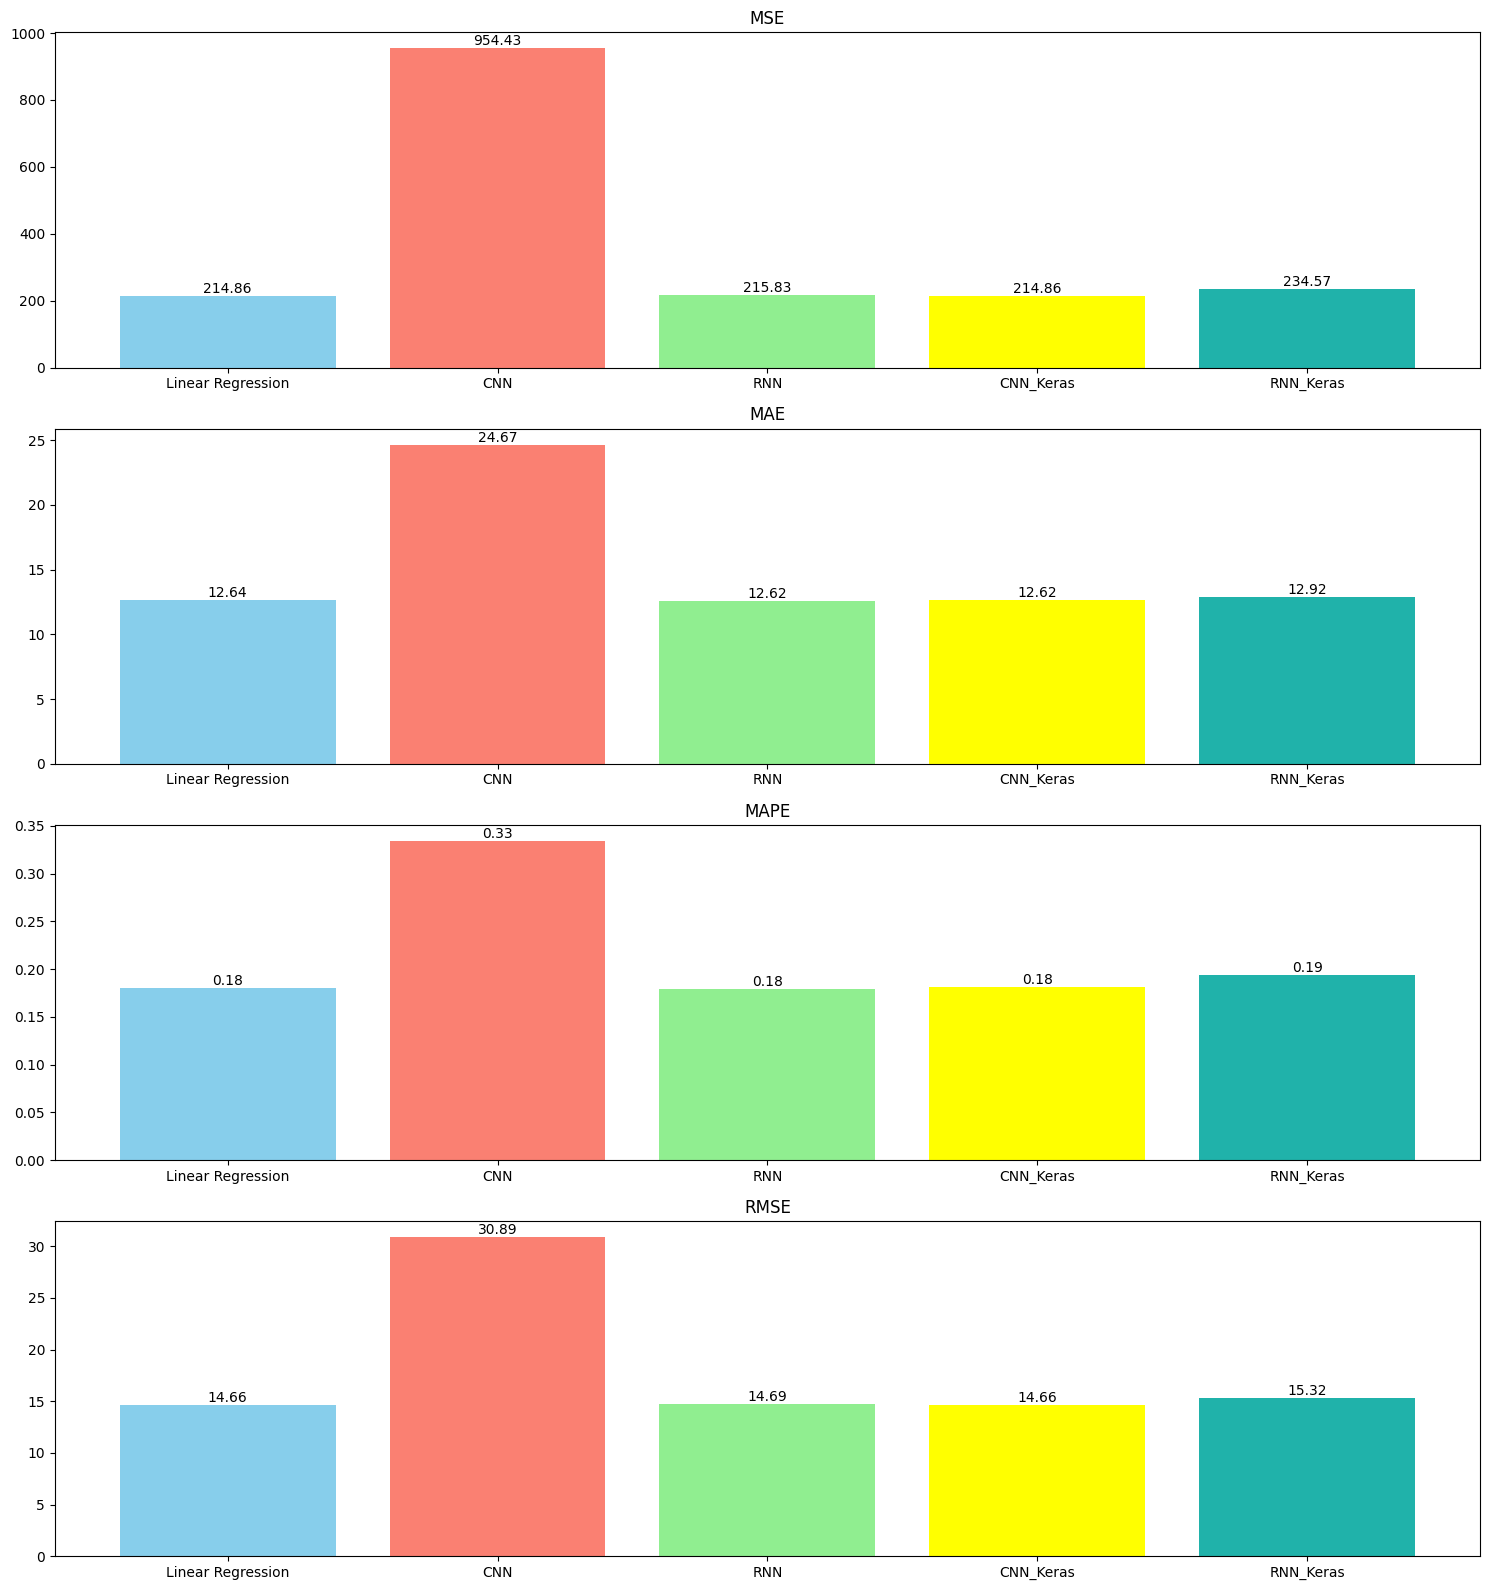

In [33]:
fig, ax = plt.subplots(4, 1, figsize=(15, 16))

bar1 = ax[0].bar(['Linear Regression', 'CNN', 'RNN', 'CNN_Keras', 'RNN_Keras'], [mse_lr, mse_cnn, mse_rnn, mse_cnn_keras, mse_rnn_keras], color=['skyblue', 'salmon', 'lightgreen', 'yellow', 'lightseagreen'])
ax[0].set_title("MSE")
for bar in bar1:
    height = bar.get_height()
    ax[0].text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

bar2 = ax[1].bar(['Linear Regression', 'CNN', 'RNN', 'CNN_Keras', 'RNN_Keras'], [mae_lr, mae_cnn, mae_rnn, mae_cnn_keras, mae_rnn_keras], color=['skyblue', 'salmon', 'lightgreen', 'yellow', 'lightseagreen'])
ax[1].set_title("MAE")
for bar in bar2:
    height = bar.get_height()
    ax[1].text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

bar3 = ax[2].bar(['Linear Regression', 'CNN', 'RNN', 'CNN_Keras', 'RNN_Keras'], [mape_lr, mape_cnn, mape_rnn, mape_cnn_keras, mape_rnn_keras], color=['skyblue', 'salmon', 'lightgreen', 'yellow', 'lightseagreen'])
ax[2].set_title("MAPE")
for bar in bar3:
    height = bar.get_height()
    ax[2].text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

bar4 = ax[3].bar(['Linear Regression', 'CNN', 'RNN', 'CNN_Keras', 'RNN_Keras'], [rmse_lr, rmse_cnn, rmse_rnn, rmse_cnn_keras, rmse_rnn_keras], color=['skyblue', 'salmon', 'lightgreen', 'yellow', 'lightseagreen'])
ax[3].set_title("RMSE")
for bar in bar4:
    height = bar.get_height()
    ax[3].text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [34]:
from tensorflow.keras.models import load_model

model = load_model('./rnn.h5')

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 2, 32)          │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 64)             │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,411 (36.77 KB)

 Trainable params: 9,409 (36.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [38]:
df1 = pd.read_csv('person.csv')
X = df1[['Height_m', 'Job_encode']]
scaler = MinMaxScaler()
scaler.fit(X)
scaler.transform([[1.7, 1]])[0]

C:\Users\xin chao\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([0.4       , 0.03448276])